In [1]:
import numpy as np
import pandas as pd
from skopt import gp_minimize, gbrt_minimize 
from skopt.plots import plot_convergence, plot_objective
from rl4greencrab.envs.green_crab_monthly_env import greenCrabMonthEnv
from rl4greencrab.envs.green_crab_monthly_env_norm import greenCrabMonthEnvNormalized
from rl4greencrab import evaluate_agent, multiConstAction, simulator
import matplotlib.pyplot as plt 
from ipywidgets import interact, widgets
from huggingface_hub import hf_hub_download
from stable_baselines3 import PPO, TD3
from stable_baselines3.common.env_util import make_vec_env
from sb3_contrib import TQC, RecurrentPPO

In [2]:
config = {
    "w_mort_scale" : 600,
    "growth_k": 0.70,
}

In [6]:
env = greenCrabMonthEnvNormalized({'random_start':True})
vec_env = make_vec_env(greenCrabMonthEnvNormalized, n_envs=12)

In [7]:
model = PPO('MultiInputPolicy', env , verbose=0, tensorboard_log="/home/rstudio/logs")
model.learn(
	total_timesteps=500_000, 
	progress_bar=True,
)
model.save("ppo_month_observation")

Output()

In [6]:
ppoAgent = PPO.load("ppo_month_observation", device="cpu")

In [7]:
evalEnv = greenCrabMonthEnvNormalized()

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [8]:
N_EPS = 30

ppo_rew = evaluate_agent(agent=ppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)

import ray
ray.shutdown()

2025-03-28 07:17:32,183	INFO worker.py:1841 -- Started a local Ray instance.


In [9]:
ppo_rew

-0.9535424248195348

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,0.000000,0
1,1,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.000061,0
2,2,-1.0,-1.0,-1.000000,-1.000000,-0.959586,-0.000123,0
3,3,-1.0,-1.0,-0.902852,-0.920349,-1.000000,-0.008267,0
4,4,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.015400,0
5,5,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.015461,0
6,6,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.015522,0
7,7,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.015584,0
8,8,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-0.015645,0
9,9,-1.0,-1.0,-1.000000,-0.765892,-1.000000,-0.015706,0


<Axes: xlabel='t'>

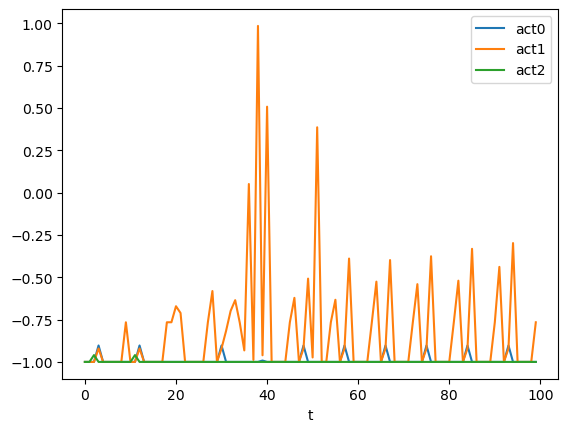

In [10]:
ppoData = simulator(env = evalEnv, agent = ppoAgent).simulate_full_named_dict_obs_acts()
ppoDataDF = pd.DataFrame(ppoData)
display(ppoDataDF.head(10))
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2'])

<Axes: xlabel='t'>

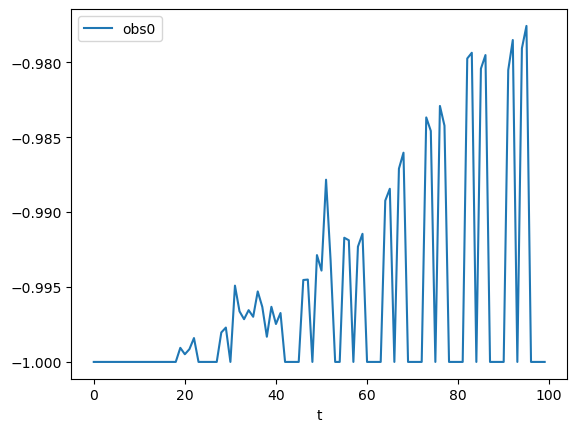

In [11]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['obs0'])

In [11]:
td3Agent = TD3.load("TD3_gcmenorm", device="cpu")

In [9]:
evalEnv = greenCrabMonthEnvNormalized()

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [ ]:
N_EPS = 30

td3_rew = evaluate_agent(agent=ppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)

import ray
ray.shutdown()

In [12]:
td3Data = simulator(env = evalEnv, agent = td3Agent).simulate_full_named_obs_acts()
td3DataDF = pd.DataFrame(td3Data)
display(td3DataDF.head())
td3DataDF[td3DataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2'])

TypeError: 'NoneType' object cannot be interpreted as an integer

<Axes: xlabel='t'>

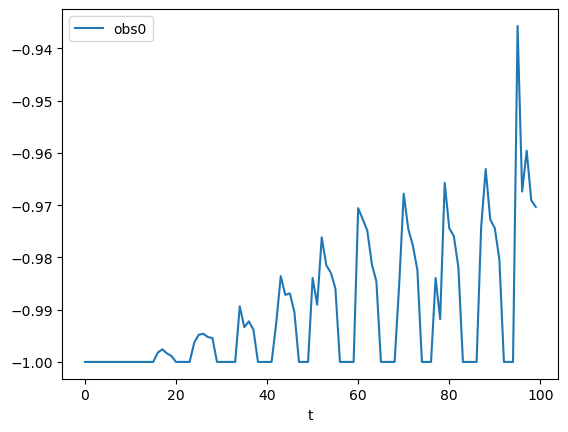

In [113]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['obs0'])